## Data Exploration and Preprocessing

In [174]:

## Import the Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler,FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split



# Load the dataset
df = pd.read_csv(r'C:\Users\ambig\jupiter_notebook\Cognifyz intern_Projects\data\Dataset .csv')
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [175]:
# Checking the number of rows and columns
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 9551
Number of columns: 21


In [176]:
# Checking for missing values in each column
missing_values = df.isnull().sum()
missing_percentage = (missing_values / num_rows) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
})
print(missing_data)


                      Missing Values  Missing Percentage
Restaurant ID                      0            0.000000
Restaurant Name                    0            0.000000
Country Code                       0            0.000000
City                               0            0.000000
Address                            0            0.000000
Locality                           0            0.000000
Locality Verbose                   0            0.000000
Longitude                          0            0.000000
Latitude                           0            0.000000
Cuisines                           9            0.094231
Average Cost for two               0            0.000000
Currency                           0            0.000000
Has Table booking                  0            0.000000
Has Online delivery                0            0.000000
Is delivering now                  0            0.000000
Switch to order menu               0            0.000000
Price range                    

In [177]:

# drop rows with missing values (if necessary):
df = df.dropna()


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu  9542

In [179]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [180]:
## Check the dataset ntypes are

df.columns = df.columns.str.lower() # Convert column names to lower case

df.columns = df.columns.str.replace(' ', '_') # Replace spaces with underscores

df.columns = df.columns.str.replace('[^a-zA-Z0-9_]', '') # Remove special characters

In [181]:
df.columns

Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'switch_to_order_menu',
       'price_range', 'aggregate_rating', 'rating_color', 'rating_text',
       'votes'],
      dtype='object')

In [182]:
def find_unique(df, col):
    if df[col].dtype == 'object':
        print("The Ntypes values in the column")
        print(df[col].unique())
        print(df[col].value_counts())
        print('----------------------------------------------------------------')

In [183]:
df[(df['city'] == 'Bras�_lia') | 
   (df['city'] == 'S��o Paulo') | 
   (df['city'] == '��stanbul')].head(1)


,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,...,currency,has_table_booking,has_online_delivery,is_delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes
22,6600681,Chez Michou,30,Bras�_lia,"SCLN, 208, Bloco A, Loja 30, Asa Norte, Bras�_lia",Asa Norte,"Asa Norte, Bras�_lia",-47.881789,-15.764142,"Fast Food, French",...,Brazilian Real(R$),No,No,No,No,2,3.0,Orange,Average,6


In [184]:
# Replace incorrect or malformed city names in the 'city' column of the DataFrame with their correct spellings
df['city'] = df['city'].replace(
    {'Bras�_lia': 'Brasília',       # Correcting 'Bras�_lia' to 'Brasília'
     'S��o Paulo': 'São Paulo',    # Correcting 'S��o Paulo' to 'São Paulo'
     '��stanbul': 'Istanbul'       # Correcting '��stanbul' to 'Istanbul'
     }
)


In [185]:
# Remove duplicates and missing values
df = df.drop_duplicates().dropna()

# Replace NaN values with an empty list
df['cuisines'] = df['cuisines'].fillna('')

# Splitting the 'cuisines' column into a list of cuisines
df['cuisines'] = df['cuisines'].str.split(', ')

# Creating four new columns for the cuisines
df['cuisine1'] = df['cuisines'].apply(lambda x: x[0] if len(x) > 0 else None)
df['cuisine2'] = df['cuisines'].apply(lambda x: x[1] if len(x) > 1 else None)
df['cuisine3'] = df['cuisines'].apply(lambda x: x[2] if len(x) > 2 else None)
df['cuisine4'] = df['cuisines'].apply(lambda x: x[3] if len(x) > 3 else None)

# Dropping the original 'cuisines' column
df = df.drop(columns=['cuisines'])

# Count the occurrences of each cuisine
cuisine_counts = df[['cuisine1', 'cuisine2', 'cuisine3', 'cuisine4']].apply(pd.Series.value_counts).fillna(0).astype(int)

# Calculate the total number of occurrences for each cuisine
cuisine_counts['Total'] = cuisine_counts.sum(axis=1)

# Replace NaN values with an empty list
df['address'] = df['address'].fillna('')

# Splitting the 'address' column into a list of address
df['address'] = df['address'].str.split(', ')

# Creating four new columns for the cuisines
df['floor'] = df['address'].apply(lambda x: x[0] if len(x) > 0 else None)
df['mall_name'] = df['address'].apply(lambda x: x[1] if len(x) > 1 else None)
df['street_name'] = df['address'].apply(lambda x: x[2] if len(x) > 2 else None)
df['city'] = df['address'].apply(lambda x: x[3] if len(x) > 3 else None)

# Dropping the original 'cuisines' column
df = df.drop(columns=['address','locality','locality_verbose'])

# Mapping rating text to numerical scores (e.g., Excellent = 5, Very Good = 4)
rating_weights = {'Excellent': 5, 'Very Good': 4, 'Good': 3, 'Average': 2, 'Poor': 1}

# Popularity score is the number of votes multiplied by the rating score
df['popularity_score'] = df['votes'] * df['rating_text'].map(rating_weights)  # Formula: popularity_score = votes * rating_score


# Categorizing average cost into different price levels: Low, Medium, High, Very High
price_bins = [0, 500, 1000, 2000]  # Price ranges
price_labels = ['Low', 'Medium', 'High']  # Labels for price categories

# Assigning each restaurant to a price level based on average cost
df['price_level'] = pd.cut(df['average_cost_for_two'], bins=price_bins, labels=price_labels, include_lowest=True)  # Formula: cut(average_cost_for_two, price_bins)


# Counting the number of cuisines for each restaurant (non-null entries in cuisine columns)
df['cuisine_count'] = df[['cuisine1', 'cuisine2', 'cuisine3', 'cuisine4']].notna().sum(axis=1)  # Formula: count(non-null values in cuisine columns)

def extract_floor(floor):
    # Map common floor names to numbers
    floor_mapping = {
        "Ground Floor": 0,
        "First Floor": 1,
        "Second Floor": 2,
        "Third Floor": 3,
        "Fourth Floor": 4
    }
    # Check if the floor matches the mapping
    if isinstance(floor, str):
        for key in floor_mapping:
            if key in floor:
                return floor_mapping[key]
    return 0

# Apply the function to the floor column
df["floor"] = df["floor"].apply(extract_floor)
# Replace all occurrences of 'None' with 'Unknown' in the entire DataFrame only if datatype is object
#df['floor'] = df['floor'].astype(str).replace('None', 'Unknown', regex=True)
# Replace all occurrences of 'None' with 0 in the entire DataFrame only if datatype is object

#df['floor'] = df['floor'].astype(str).replace('None', 0, regex=True)

# Check if the replacement was successful
print(df.isin(['None']).sum())  # This will show how many 'None' values are left in the DataFrame


df.drop(columns=['restaurant_name','restaurant_id','votes','has_online_delivery','popularity_score','average_cost_for_two','country_code','switch_to_order_menu','mall_name','street_name'], inplace=True)

df.head(2)



restaurant_id           0
restaurant_name         0
country_code            0
city                    0
longitude               0
latitude                0
average_cost_for_two    0
currency                0
has_table_booking       0
has_online_delivery     0
is_delivering_now       0
switch_to_order_menu    0
price_range             0
aggregate_rating        0
rating_color            0
rating_text             0
votes                   0
cuisine1                0
cuisine2                0
cuisine3                0
cuisine4                0
floor                   0
mall_name               0
street_name             0
popularity_score        0
price_level             0
cuisine_count           0
dtype: int64


,city,longitude,latitude,currency,has_table_booking,is_delivering_now,price_range,aggregate_rating,rating_color,rating_text,cuisine1,cuisine2,cuisine3,cuisine4,floor,price_level,cuisine_count
0,Poblacion,121.027535,14.565443,Botswana Pula(P),Yes,No,3,4.8,Dark Green,Excellent,French,Japanese,Desserts,None,3,High,3
1,Makati City,121.014101,14.553708,Botswana Pula(P),Yes,No,3,4.5,Dark Green,Excellent,Japanese,None,None,None,0,High,1


In [186]:
# Define the target column
y = df['aggregate_rating']  # target column

# Drop 'aggregate_rating' column from the features (X)
X = df.drop(columns=['aggregate_rating'])

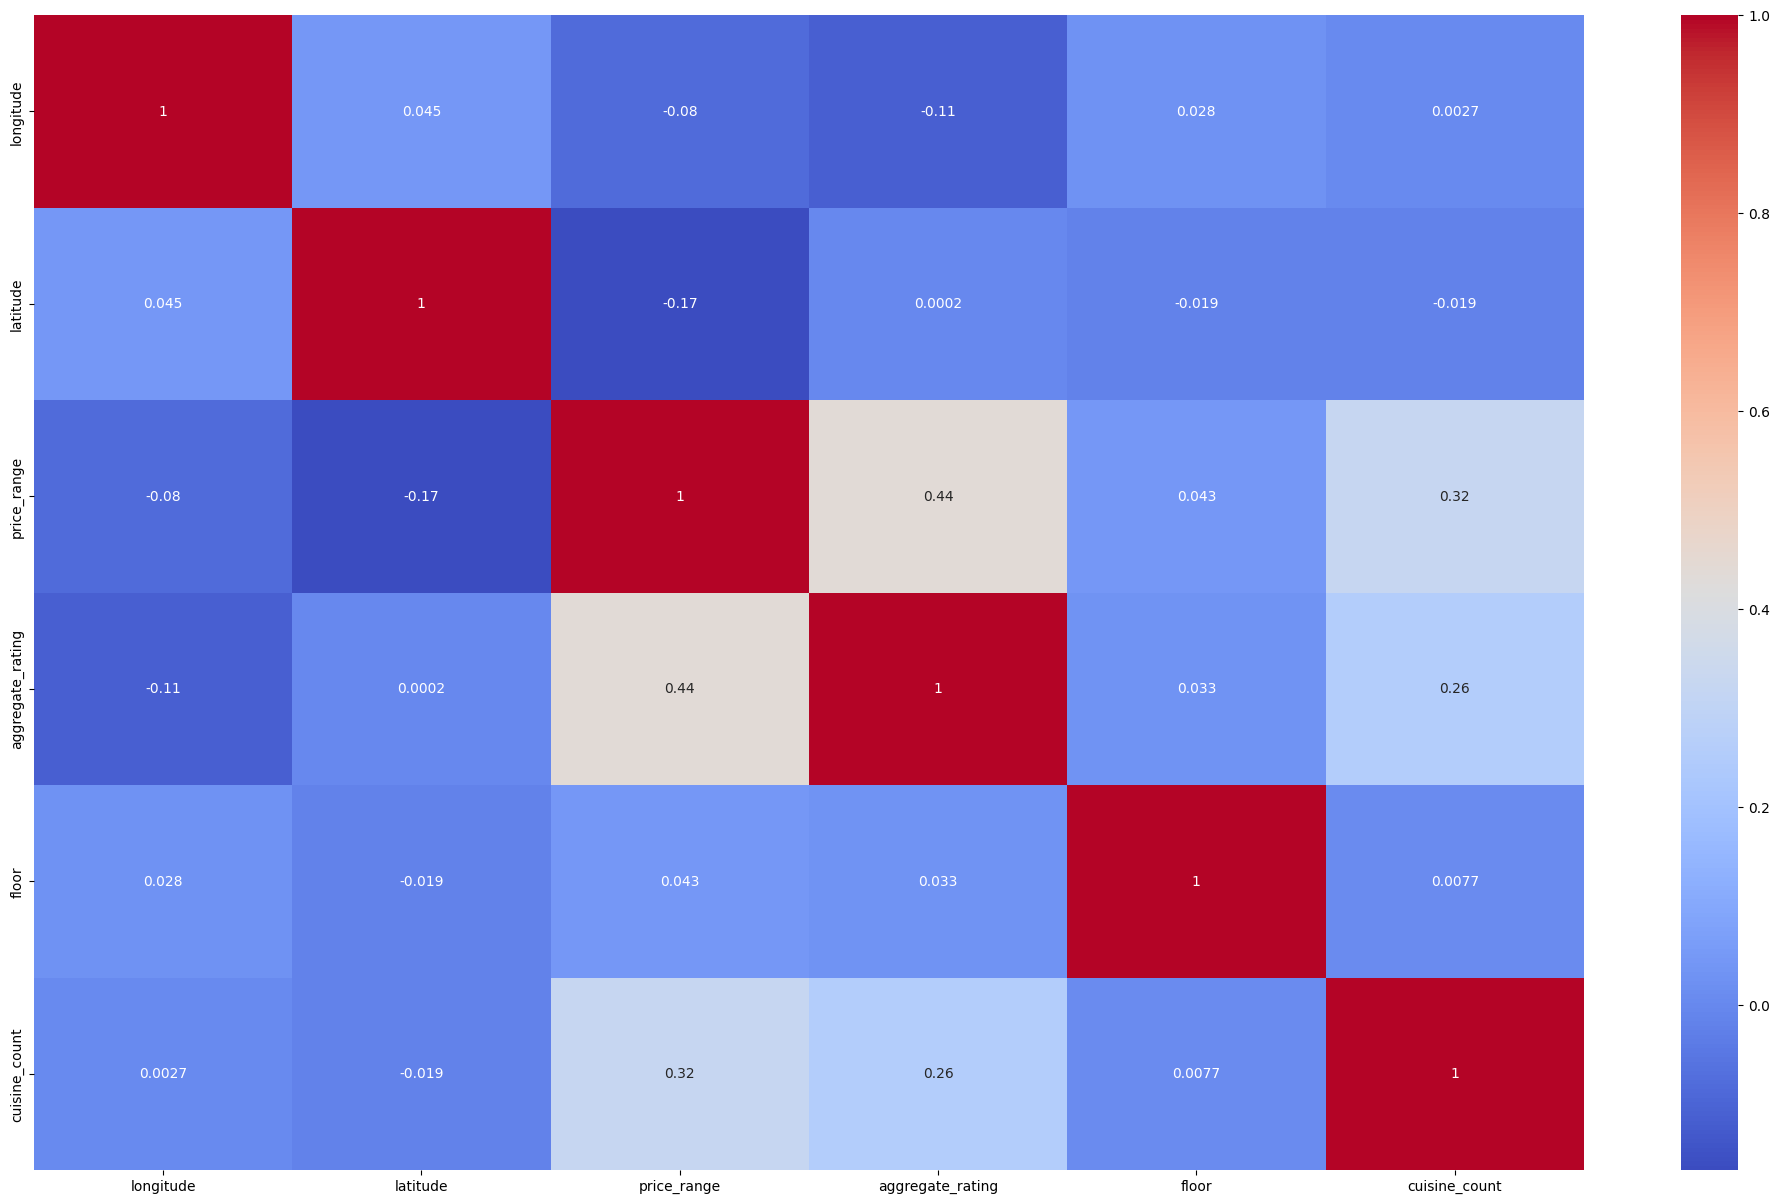

In [187]:
## Plot heatmap for identify the corrleations between features
plt.figure(figsize=(25, 15))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [188]:
df.dtypes

city                   object
longitude             float64
latitude              float64
currency               object
has_table_booking      object
is_delivering_now      object
price_range             int64
aggregate_rating      float64
rating_color           object
rating_text            object
cuisine1               object
cuisine2               object
cuisine3               object
cuisine4               object
floor                   int64
price_level          category
cuisine_count           int64
dtype: object

In [189]:
## Print the categotcal and numerical column names
categorical_column_names = df.select_dtypes(include = ['object' ]).columns
print("Categorical column names: ", categorical_column_names)
numerical_column_names = df.select_dtypes(include = ['int64', 'float64']).columns
print("Numerical column names: ", numerical_column_names)


Categorical column names:  Index(['city', 'currency', 'has_table_booking', 'is_delivering_now',
       'rating_color', 'rating_text', 'cuisine1', 'cuisine2', 'cuisine3',
       'cuisine4'],
      dtype='object')
Numerical column names:  Index(['longitude', 'latitude', 'price_range', 'aggregate_rating', 'floor',
       'cuisine_count'],
      dtype='object')


In [190]:
print(df.select_dtypes(include=['object']).nunique())


city                 1358
currency               12
has_table_booking       2
is_delivering_now       2
rating_color            6
rating_text             6
cuisine1              119
cuisine2              116
cuisine3               99
cuisine4               72
dtype: int64


In [192]:
# Define the target column
y = df['aggregate_rating']  # target column

# Drop 'aggregate_rating' column from the features (X)
X = df.drop(columns=['aggregate_rating'])

In [195]:
# make train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [197]:
from tensorflow.keras.utils import to_categorical

# Extract the categorical column(s)
categorical_train = X_train.select_dtypes(include=['object','category'])
categorical_test = X_train.select_dtypes(exclude=['object','category'])

# One-hot encode using to_categorical
categorical_train_encoded = to_categorical(categorical_train, num_classes=3)
categorical_test_encoded = to_categorical(categorical_test, num_classes=3)

print("Categorical train one-hot encoded:\n", categorical_train_encoded)
print("Categorical test one-hot encoded:\n", categorical_test_encoded)


ValueError: invalid literal for int() with base 10: 'Sector 32'

In [ ]:

import joblib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pandas as pd

# Ensure no duplicate columns in the onehot_columns list
onehot_columns = ['currency', 'has_table_booking', 
       'is_delivering_now', 'rating_color',
       'rating_text']


# Ensure only numeric columns are included in the numeric_columns list
numeric_columns = X.select_dtypes(include=['float', 'int']).columns.tolist()

# Make the columns in df not in onehot_columns make as label_columns
label_columns = [col for col in X.columns if col not in onehot_columns and col in numeric_columns]

# Check the columns selected for numeric transformation
print("Numeric Columns: ", numeric_columns)
print("OneHot Columns:", onehot_columns)
print("Label Columns:", label_columns)

# Define the transformers for numeric and categorical columns (without SimpleImputer)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize numeric columns
])

# Custom LabelEncoder transformer for high-cardinality columns
class LabelEncoderTransformer:
    def fit(self, X, y=None):
        self.encoders = {col: LabelEncoder().fit(X[col]) for col in X.columns}
        return self

    def transform(self, X):
        return pd.DataFrame({col: self.encoders[col].transform(X[col]) for col in X.columns})

# Combine transformations for categorical columns
categorical_transformer = ColumnTransformer(
    transformers=[ 
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), onehot_columns),
        ('label', Pipeline([
            ('encoder', LabelEncoderTransformer())  # Apply LabelEncoder
        ]), label_columns)
    ],
    remainder='passthrough'  # Keep non-specified columns unchanged
)

# Combine numeric and categorical transformers into one preprocessor pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_columns),  # Apply numeric transformations
        ('categorical', categorical_transformer, onehot_columns + label_columns)  # Apply categorical transformations
    ]
)

# Save the preprocessor to a file
joblib.dump(preprocessor, 'preprocessor.pkl')

print("Preprocessor saved successfully!")

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Ensure X_train is a DataFrame and apply preprocessing
X_train_transformed = preprocessor.fit_transform(X_train)

# Transform the test data using the already fitted preprocessor
X_test_transformed = preprocessor.transform(X_test)

print("X_train_transformed shape:", X_train_transformed.shape)
print("X_test_transformed shape:", X_test_transformed.shape)


Numeric Columns:  ['longitude', 'latitude', 'price_range', 'floor', 'cuisine_count']
OneHot Columns: ['currency', 'has_table_booking', 'is_delivering_now', 'rating_color', 'rating_text']
Label Columns: ['longitude', 'latitude', 'price_range', 'floor', 'cuisine_count']
Preprocessor saved successfully!


ValueError: y contains previously unseen labels: [np.float64(-157.8312476), np.float64(-157.827196), np.float64(-156.674835), np.float64(-156.366445), np.float64(-116.281809), np.float64(-116.280614), np.float64(-116.2463), np.float64(-116.203466), np.float64(-116.202845), np.float64(-116.2023), np.float64(-116.2021), np.float64(-116.185034), np.float64(-112.461326), np.float64(-112.459988), np.float64(-112.4524), np.float64(-112.4419), np.float64(-112.441), np.float64(-112.4397), np.float64(-112.0127), np.float64(-106.057666), np.float64(-96.4204), np.float64(-96.1608), np.float64(-93.7441981), np.float64(-93.643094), np.float64(-93.621631), np.float64(-93.611366), np.float64(-92.456343), np.float64(-92.4457417), np.float64(-92.4291), np.float64(-92.3234), np.float64(-91.6499622), np.float64(-91.6336), np.float64(-91.569767), np.float64(-91.534424), np.float64(-91.5314), np.float64(-91.531093), np.float64(-90.740213), np.float64(-90.7264), np.float64(-90.715247), np.float64(-90.6658), np.float64(-90.6646), np.float64(-90.658988), np.float64(-90.5737), np.float64(-90.5716), np.float64(-90.5686), np.float64(-90.515175), np.float64(-90.50709), np.float64(-90.504176), np.float64(-90.496986), np.float64(-87.4218962), np.float64(-87.2252), np.float64(-87.2216), np.float64(-87.211082), np.float64(-87.143), np.float64(-87.142602), np.float64(-85.294955), np.float64(-85.1079396), np.float64(-84.9936), np.float64(-84.992671), np.float64(-84.992342), np.float64(-84.9607), np.float64(-84.954984), np.float64(-84.9436), np.float64(-84.927047), np.float64(-83.986119), np.float64(-83.983939), np.float64(-83.8389), np.float64(-83.8272), np.float64(-83.6737), np.float64(-83.636618), np.float64(-83.628703), np.float64(-83.6276), np.float64(-83.3828224), np.float64(-83.3389), np.float64(-83.332796), np.float64(-83.319123), np.float64(-83.29633), np.float64(-83.289338), np.float64(-83.2868), np.float64(-83.281), np.float64(-82.820856), np.float64(-82.762624), np.float64(-82.6329663), np.float64(-82.632174), np.float64(-82.4852372), np.float64(-82.483124), np.float64(-82.080788), np.float64(-82.0805493), np.float64(-82.0698), np.float64(-81.97), np.float64(-81.965571), np.float64(-81.351467), np.float64(-81.091482), np.float64(-48.01909167), np.float64(-48.019), np.float64(-47.92366667), np.float64(-47.88266667), np.float64(-47.88178889), np.float64(-47.87283333), np.float64(-47.872359), np.float64(-47.8685), np.float64(-43.377), np.float64(-43.227042), np.float64(-43.211425), np.float64(-43.203), np.float64(-43.18669167), np.float64(-3.208363), np.float64(-3.201683333), np.float64(-2.245077), np.float64(-2.242833333), np.float64(-1.907596), np.float64(-1.858529), np.float64(-0.162092), np.float64(-0.144861), np.float64(-0.136576), np.float64(-0.135524), np.float64(-0.123132), np.float64(-0.076580556), np.float64(18.418015), np.float64(18.42030041), np.float64(28.04833811), np.float64(28.05466667), np.float64(29.0028964), np.float64(29.02601603), np.float64(29.03464001), np.float64(32.80924722), np.float64(32.82121389), np.float64(32.86021667), np.float64(51.3500471), np.float64(51.5141453), np.float64(51.54457591), np.float64(54.358147), np.float64(54.36615754), np.float64(54.37127855), np.float64(54.37332205), np.float64(54.60685361), np.float64(55.215341), np.float64(55.288061), np.float64(55.32874), np.float64(55.37637066), np.float64(55.39269626), np.float64(72.5072645), np.float64(72.511307), np.float64(72.5375741), np.float64(72.5434513), np.float64(72.5570374), np.float64(72.77262915), np.float64(72.79361609), np.float64(72.825451), np.float64(72.83398401), np.float64(72.86238123), np.float64(73.164798), np.float64(73.169083), np.float64(73.170937), np.float64(73.72076757), np.float64(73.75574991), np.float64(73.76043056), np.float64(73.76363333), np.float64(73.76504313), np.float64(73.776176), np.float64(73.77734005), np.float64(73.827423), np.float64(73.8303275), np.float64(73.897902), np.float64(74.85158611), np.float64(74.86276111), np.float64(74.873005), np.float64(75.36479167), np.float64(75.37235278), np.float64(75.7890337), np.float64(75.80208298), np.float64(75.8212021), np.float64(75.82184684), np.float64(75.82680825), np.float64(75.83284054), np.float64(75.8869592), np.float64(76.27699893), np.float64(76.28112778), np.float64(76.29521111), np.float64(76.30758885), np.float64(76.34539722), np.float64(76.61820278), np.float64(76.62109444), np.float64(76.63002778), np.float64(76.63058333), np.float64(76.7187888), np.float64(76.76560555), np.float64(76.7978909), np.float64(76.849258), np.float64(76.95295), np.float64(76.9752946), np.float64(76.9754397), np.float64(76.9869396), np.float64(76.9877493), np.float64(76.9879296), np.float64(76.9909279), np.float64(76.9910765), np.float64(76.9935221), np.float64(76.99501667), np.float64(76.9967933), np.float64(76.9983492), np.float64(77.0003579), np.float64(77.0005841), np.float64(77.0028244), np.float64(77.0076551), np.float64(77.0093235), np.float64(77.0094083), np.float64(77.0117519), np.float64(77.0136441), np.float64(77.0141435), np.float64(77.0166864), np.float64(77.0175175), np.float64(77.0175382), np.float64(77.0189174), np.float64(77.0190993), np.float64(77.0194842), np.float64(77.0196076), np.float64(77.0200512), np.float64(77.0204025), np.float64(77.022202), np.float64(77.0225318), np.float64(77.0252309), np.float64(77.0283498), np.float64(77.0302241), np.float64(77.0322933), np.float64(77.033231), np.float64(77.0336712), np.float64(77.0338596), np.float64(77.033939), np.float64(77.0344852), np.float64(77.0349588), np.float64(77.0349627), np.float64(77.0373642), np.float64(77.037568), np.float64(77.0376289), np.float64(77.037781), np.float64(77.0378566), np.float64(77.0381307), np.float64(77.0391009), np.float64(77.0391763), np.float64(77.0394496), np.float64(77.0395353), np.float64(77.0400898), np.float64(77.0409828), np.float64(77.0411281), np.float64(77.0413756), np.float64(77.0418292), np.float64(77.042691), np.float64(77.04290237), np.float64(77.044168), np.float64(77.0445955), np.float64(77.0446703), np.float64(77.0447626), np.float64(77.044871), np.float64(77.0452475), np.float64(77.0462096), np.float64(77.0473507), np.float64(77.048056), np.float64(77.0484406), np.float64(77.0502902), np.float64(77.0505547), np.float64(77.0512923), np.float64(77.0514542), np.float64(77.051885), np.float64(77.0535606), np.float64(77.0536264), np.float64(77.0540643), np.float64(77.054079), np.float64(77.0549336), np.float64(77.0553395), np.float64(77.0555919), np.float64(77.0558517), np.float64(77.0566033), np.float64(77.056812), np.float64(77.0571866), np.float64(77.0572815), np.float64(77.057516), np.float64(77.0575645), np.float64(77.0587691), np.float64(77.0590998), np.float64(77.0593696), np.float64(77.059536), np.float64(77.0598983), np.float64(77.06034612), np.float64(77.0605838), np.float64(77.0607991), np.float64(77.0612584), np.float64(77.0622916), np.float64(77.0623603), np.float64(77.06247076), np.float64(77.0626075), np.float64(77.0629673), np.float64(77.0631472), np.float64(77.0631922), np.float64(77.0632194), np.float64(77.0633585), np.float64(77.063507), np.float64(77.0635969), np.float64(77.0646633), np.float64(77.066475), np.float64(77.0670773), np.float64(77.067268), np.float64(77.0675373), np.float64(77.0686475), np.float64(77.0687114), np.float64(77.06883967), np.float64(77.06931744), np.float64(77.0698477), np.float64(77.0703873), np.float64(77.0707437), np.float64(77.0709719), np.float64(77.07128014), np.float64(77.0715259), np.float64(77.0716464), np.float64(77.0735119), np.float64(77.0738947), np.float64(77.0739295), np.float64(77.0742061), np.float64(77.0743071), np.float64(77.0745897), np.float64(77.07506843), np.float64(77.0752887), np.float64(77.0753139), np.float64(77.0756895), np.float64(77.0761542), np.float64(77.0762723), np.float64(77.0766826), np.float64(77.0771773), np.float64(77.0779417), np.float64(77.078405), np.float64(77.0786436), np.float64(77.0787681), np.float64(77.0788859), np.float64(77.0789039), np.float64(77.0789309), np.float64(77.0792261), np.float64(77.0792715), np.float64(77.07935278), np.float64(77.0793669), np.float64(77.079438), np.float64(77.0795604), np.float64(77.0796054), np.float64(77.0797403), np.float64(77.0801187), np.float64(77.080144), np.float64(77.0801674), np.float64(77.08040039), np.float64(77.0809099), np.float64(77.0813133), np.float64(77.0813721), np.float64(77.0815256), np.float64(77.0817069), np.float64(77.08171561), np.float64(77.0819105), np.float64(77.0820784), np.float64(77.0829327), np.float64(77.0832002), np.float64(77.0832256), np.float64(77.0832881), np.float64(77.0834723), np.float64(77.0837565), np.float64(77.083835), np.float64(77.0840568), np.float64(77.0842702), np.float64(77.0843946), np.float64(77.0846233), np.float64(77.0846413), np.float64(77.084917), np.float64(77.0849466), np.float64(77.0850323), np.float64(77.0853157), np.float64(77.08591864), np.float64(77.0859902), np.float64(77.0864035), np.float64(77.0864659), np.float64(77.08695229), np.float64(77.0870678), np.float64(77.0871273), np.float64(77.0871573), np.float64(77.087295), np.float64(77.08729528), np.float64(77.0875189), np.float64(77.0884181), np.float64(77.0884763), np.float64(77.088553), np.float64(77.0885987), np.float64(77.0887778), np.float64(77.0888609), np.float64(77.0889127), np.float64(77.0889219), np.float64(77.08932303), np.float64(77.0900756), np.float64(77.0902166), np.float64(77.0903881), np.float64(77.0905901), np.float64(77.090592), np.float64(77.0907871), np.float64(77.09158514), np.float64(77.09158983), np.float64(77.0921967), np.float64(77.0924646), np.float64(77.0927191), np.float64(77.093073), np.float64(77.09308315), np.float64(77.09308684), np.float64(77.09311534), np.float64(77.09312875), np.float64(77.09319044), np.float64(77.09333796), np.float64(77.0935847), np.float64(77.0941281), np.float64(77.0943529), np.float64(77.0944197), np.float64(77.0944877), np.float64(77.0946226), np.float64(77.094627), np.float64(77.0950273), np.float64(77.09503077), np.float64(77.0950645), np.float64(77.0952332), np.float64(77.0957435), np.float64(77.0961512), np.float64(77.0962201), np.float64(77.09623341), np.float64(77.0964562), np.float64(77.0965905), np.float64(77.0967623), np.float64(77.0968578), np.float64(77.09688552), np.float64(77.0970504), np.float64(77.0970875), np.float64(77.0971876), np.float64(77.0975132), np.float64(77.09791951), np.float64(77.0981006), np.float64(77.0981016), np.float64(77.0987074), np.float64(77.0987588), np.float64(77.0990488), np.float64(77.09921435), np.float64(77.0992642), np.float64(77.0994344), np.float64(77.0994974), np.float64(77.0995462), np.float64(77.0996828), np.float64(77.0998378), np.float64(77.0998394), np.float64(77.099865), np.float64(77.1000176), np.float64(77.1000307), np.float64(77.10044246), np.float64(77.1005797), np.float64(77.1005941), np.float64(77.10143723), np.float64(77.1015446), np.float64(77.101591), np.float64(77.1018025), np.float64(77.1020369), np.float64(77.1020406), np.float64(77.1021755), np.float64(77.1026087), np.float64(77.1028857), np.float64(77.1041432), np.float64(77.1042435), np.float64(77.1043454), np.float64(77.105132), np.float64(77.1052774), np.float64(77.1063438), np.float64(77.1063609), np.float64(77.1064014), np.float64(77.1064348), np.float64(77.1065259), np.float64(77.10665), np.float64(77.1069062), np.float64(77.1072554), np.float64(77.1073558), np.float64(77.1074751), np.float64(77.1077373), np.float64(77.1087258), np.float64(77.1088139), np.float64(77.1088295), np.float64(77.1097172), np.float64(77.1097279), np.float64(77.1109839), np.float64(77.1112093), np.float64(77.1116159), np.float64(77.1120655), np.float64(77.1120745), np.float64(77.1122453), np.float64(77.11235), np.float64(77.1124028), np.float64(77.1127855), np.float64(77.1136177), np.float64(77.1140883), np.float64(77.1144456), np.float64(77.11450998), np.float64(77.1146413), np.float64(77.1149915), np.float64(77.1151872), np.float64(77.1155946), np.float64(77.1157942), np.float64(77.1159313), np.float64(77.1163525), np.float64(77.1165235), np.float64(77.1168303), np.float64(77.1172042), np.float64(77.1172443), np.float64(77.1172629), np.float64(77.1176174), np.float64(77.1176368), np.float64(77.117922), np.float64(77.1181788), np.float64(77.119036), np.float64(77.1192507), np.float64(77.1193188), np.float64(77.1193284), np.float64(77.119336), np.float64(77.11992847), np.float64(77.1199715), np.float64(77.11999476), np.float64(77.12002393), np.float64(77.1200278), np.float64(77.1200667), np.float64(77.1200955), np.float64(77.1200964), np.float64(77.1201029), np.float64(77.1201223), np.float64(77.1202741), np.float64(77.1203644), np.float64(77.12046923), np.float64(77.120642), np.float64(77.120791), np.float64(77.1212104), np.float64(77.12141566), np.float64(77.12178456), np.float64(77.1224178), np.float64(77.1225291), np.float64(77.1227629), np.float64(77.122793), np.float64(77.1228536), np.float64(77.12289), np.float64(77.1229435), np.float64(77.12327108), np.float64(77.1237408), np.float64(77.1237525), np.float64(77.1240222), np.float64(77.1243368), np.float64(77.1244717), np.float64(77.1250143), np.float64(77.1250975), np.float64(77.1254605), np.float64(77.1270882), np.float64(77.12735139), np.float64(77.12736078), np.float64(77.1274382), np.float64(77.1285619), np.float64(77.12881389), np.float64(77.1293063), np.float64(77.1296406), np.float64(77.1297061), np.float64(77.1304079), np.float64(77.130674), np.float64(77.1312221), np.float64(77.1322924), np.float64(77.13307187), np.float64(77.1331014), np.float64(77.1331449), np.float64(77.13329248), np.float64(77.1333485), np.float64(77.13403689), np.float64(77.1340901), np.float64(77.13418), np.float64(77.1344612), np.float64(77.1345396), np.float64(77.134618), np.float64(77.1354441), np.float64(77.1355204), np.float64(77.1355462), np.float64(77.1355856), np.float64(77.1356151), np.float64(77.1358371), np.float64(77.1362474), np.float64(77.1362569), np.float64(77.1367382), np.float64(77.1367966), np.float64(77.137174), np.float64(77.1374915), np.float64(77.1382808), np.float64(77.1384794), np.float64(77.1391896), np.float64(77.1393754), np.float64(77.1394952), np.float64(77.139708), np.float64(77.1398511), np.float64(77.1400711), np.float64(77.1401237), np.float64(77.1401443), np.float64(77.1402024), np.float64(77.1402923), np.float64(77.1411462), np.float64(77.1413709), np.float64(77.1416405), np.float64(77.141747), np.float64(77.142172), np.float64(77.1421798), np.float64(77.1422037), np.float64(77.1428519), np.float64(77.1449374), np.float64(77.1457322), np.float64(77.1457358), np.float64(77.14631662), np.float64(77.14636557), np.float64(77.146539), np.float64(77.1466243), np.float64(77.1466576), np.float64(77.1466722), np.float64(77.146731), np.float64(77.1467374), np.float64(77.1467395), np.float64(77.1467938), np.float64(77.1468968), np.float64(77.1469965), np.float64(77.1490259), np.float64(77.1496283), np.float64(77.1497494), np.float64(77.1502689), np.float64(77.1506285), np.float64(77.1507183), np.float64(77.1513743), np.float64(77.151707), np.float64(77.1518301), np.float64(77.1519316), np.float64(77.1523361), np.float64(77.1527796), np.float64(77.1529576), np.float64(77.1538189), np.float64(77.153852), np.float64(77.1549724), np.float64(77.1551135), np.float64(77.1551985), np.float64(77.15520881), np.float64(77.1552225), np.float64(77.15538889), np.float64(77.15549883), np.float64(77.1555539), np.float64(77.1558888), np.float64(77.15598), np.float64(77.15613484), np.float64(77.1561628), np.float64(77.1564702), np.float64(77.1566556), np.float64(77.1566714), np.float64(77.1569645), np.float64(77.1586101), np.float64(77.15988658), np.float64(77.16032244), np.float64(77.1603368), np.float64(77.1606287), np.float64(77.1613232), np.float64(77.161503), np.float64(77.1622851), np.float64(77.162961), np.float64(77.16311596), np.float64(77.16341134), np.float64(77.16369834), np.float64(77.16410805), np.float64(77.16421165), np.float64(77.16427334), np.float64(77.16454592), np.float64(77.1648729), np.float64(77.165004), np.float64(77.165415), np.float64(77.16718253), np.float64(77.1674237), np.float64(77.1683221), np.float64(77.1683596), np.float64(77.168407), np.float64(77.1684265), np.float64(77.1685563), np.float64(77.1685573), np.float64(77.1688109), np.float64(77.1689671), np.float64(77.1689845), np.float64(77.1698154), np.float64(77.170087), np.float64(77.1706433), np.float64(77.170693), np.float64(77.1707986), np.float64(77.1709048), np.float64(77.1713649), np.float64(77.171471), np.float64(77.1722866), np.float64(77.172323), np.float64(77.1723764), np.float64(77.1724967), np.float64(77.1727207), np.float64(77.1728262), np.float64(77.1729864), np.float64(77.1731402), np.float64(77.1732263), np.float64(77.1737102), np.float64(77.1738744), np.float64(77.1742101), np.float64(77.1744294), np.float64(77.1745474), np.float64(77.1750799), np.float64(77.1752519), np.float64(77.1759362), np.float64(77.1760606), np.float64(77.1763302), np.float64(77.1764955), np.float64(77.177472), np.float64(77.1777131), np.float64(77.1778168), np.float64(77.1778359), np.float64(77.1778577), np.float64(77.1788585), np.float64(77.178936), np.float64(77.1790259), np.float64(77.1793165), np.float64(77.1794162), np.float64(77.1795201), np.float64(77.180053), np.float64(77.1804107), np.float64(77.1807331), np.float64(77.1807722), np.float64(77.1809764), np.float64(77.1810079), np.float64(77.1814337), np.float64(77.1817642), np.float64(77.181991), np.float64(77.1819977), np.float64(77.1820929), np.float64(77.1825191), np.float64(77.182736), np.float64(77.18303673), np.float64(77.18306556), np.float64(77.1842868), np.float64(77.1846297), np.float64(77.1853604), np.float64(77.1856029), np.float64(77.18585833), np.float64(77.1876516), np.float64(77.1878236), np.float64(77.18823351), np.float64(77.1884619), np.float64(77.1884696), np.float64(77.1884819), np.float64(77.1885648), np.float64(77.18873441), np.float64(77.1887382), np.float64(77.18888596), np.float64(77.1889269), np.float64(77.1889752), np.float64(77.18920413), np.float64(77.18937848), np.float64(77.1901224), np.float64(77.19036754), np.float64(77.190378), np.float64(77.190546), np.float64(77.1908398), np.float64(77.1912316), np.float64(77.1912358), np.float64(77.1914273), np.float64(77.191558), np.float64(77.1916947), np.float64(77.19174787), np.float64(77.1923236), np.float64(77.19249722), np.float64(77.19289754), np.float64(77.19325863), np.float64(77.1936317), np.float64(77.19366599), np.float64(77.1938889), np.float64(77.19396817), np.float64(77.19397243), np.float64(77.1940755), np.float64(77.1941291), np.float64(77.1943217), np.float64(77.19461525), np.float64(77.1948582), np.float64(77.195013), np.float64(77.1952737), np.float64(77.1952749), np.float64(77.1954089), np.float64(77.19549257), np.float64(77.195496), np.float64(77.1956478), np.float64(77.19585299), np.float64(77.1958724), np.float64(77.19591), np.float64(77.19603203), np.float64(77.1962398), np.float64(77.19650377), np.float64(77.1968947), np.float64(77.1971751), np.float64(77.19733089), np.float64(77.1974446), np.float64(77.1980333), np.float64(77.19819423), np.float64(77.1986842), np.float64(77.1987595), np.float64(77.1988082), np.float64(77.198889), np.float64(77.1990636), np.float64(77.199152), np.float64(77.19918799), np.float64(77.19935864), np.float64(77.2), np.float64(77.2001377), np.float64(77.20037151), np.float64(77.2011867), np.float64(77.2012628), np.float64(77.2016171), np.float64(77.2017569), np.float64(77.2023857), np.float64(77.2025654), np.float64(77.2027704), np.float64(77.2027931), np.float64(77.2027979), np.float64(77.2028171), np.float64(77.2030146), np.float64(77.2036513), np.float64(77.2038231), np.float64(77.20383894), np.float64(77.2039336), np.float64(77.2039851), np.float64(77.2040075), np.float64(77.2040656), np.float64(77.2041084), np.float64(77.2044507), np.float64(77.2045516), np.float64(77.2046327), np.float64(77.20467545), np.float64(77.2046959), np.float64(77.2048445), np.float64(77.2049879), np.float64(77.2054205), np.float64(77.205485), np.float64(77.20637999), np.float64(77.2070566), np.float64(77.2072484), np.float64(77.2072686), np.float64(77.2075961), np.float64(77.2076069), np.float64(77.2076072), np.float64(77.2076874), np.float64(77.2081473), np.float64(77.2082938), np.float64(77.2083451), np.float64(77.2084143), np.float64(77.2087849), np.float64(77.208794), np.float64(77.2089013), np.float64(77.2090421), np.float64(77.2090968), np.float64(77.2091154), np.float64(77.209366), np.float64(77.2096165), np.float64(77.2096819), np.float64(77.2100616), np.float64(77.2101563), np.float64(77.2104708), np.float64(77.210737), np.float64(77.21100144), np.float64(77.21109062), np.float64(77.21116707), np.float64(77.2112423), np.float64(77.21133667), np.float64(77.2115266), np.float64(77.2116483), np.float64(77.2118241), np.float64(77.21234288), np.float64(77.212447), np.float64(77.2125368), np.float64(77.2126586), np.float64(77.2129742), np.float64(77.2131207), np.float64(77.2137046), np.float64(77.2138677), np.float64(77.2141542), np.float64(77.21423384), np.float64(77.2142696), np.float64(77.2143783), np.float64(77.21439444), np.float64(77.2144524), np.float64(77.2146029), np.float64(77.2146666), np.float64(77.2148134), np.float64(77.21508846), np.float64(77.2153849), np.float64(77.21546111), np.float64(77.21558299), np.float64(77.2156892), np.float64(77.216002), np.float64(77.216129), np.float64(77.2163995), np.float64(77.2169659), np.float64(77.21751753), np.float64(77.21764829), np.float64(77.2179096), np.float64(77.21819479), np.float64(77.2184653), np.float64(77.2185071), np.float64(77.2187376), np.float64(77.21873961), np.float64(77.2187711), np.float64(77.2188042), np.float64(77.2188953), np.float64(77.21894782), np.float64(77.21900079), np.float64(77.21905142), np.float64(77.21908394), np.float64(77.2191149), np.float64(77.21920632), np.float64(77.219267), np.float64(77.2192708), np.float64(77.2193667), np.float64(77.21951913), np.float64(77.2195882), np.float64(77.21958833), np.float64(77.21961837), np.float64(77.2199026), np.float64(77.22022153), np.float64(77.22041389), np.float64(77.2206212), np.float64(77.2206488), np.float64(77.22067215), np.float64(77.2207923), np.float64(77.2208276), np.float64(77.22090885), np.float64(77.2212289), np.float64(77.2218787), np.float64(77.22215876), np.float64(77.2222225), np.float64(77.2223278), np.float64(77.2224176), np.float64(77.22285848), np.float64(77.2231362), np.float64(77.22338664), np.float64(77.2235803), np.float64(77.2237649), np.float64(77.2239446), np.float64(77.2241369), np.float64(77.2241401), np.float64(77.2243039), np.float64(77.2243586), np.float64(77.2246182), np.float64(77.224753), np.float64(77.22493695), np.float64(77.2252161), np.float64(77.2253817), np.float64(77.2254715), np.float64(77.225522), np.float64(77.2259206), np.float64(77.2263032), np.float64(77.2265367), np.float64(77.2269535), np.float64(77.2271781), np.float64(77.2273075), np.float64(77.2274924), np.float64(77.22762946), np.float64(77.227723), np.float64(77.2278068), np.float64(77.2278966), np.float64(77.2290642), np.float64(77.2293345), np.float64(77.2297102), np.float64(77.2300185), np.float64(77.2300888), np.float64(77.2301503), np.float64(77.2303467), np.float64(77.2305318), np.float64(77.2306151), np.float64(77.2307138), np.float64(77.2314893), np.float64(77.2318151), np.float64(77.2320562), np.float64(77.2321629), np.float64(77.2322198), np.float64(77.2327023), np.float64(77.2327504), np.float64(77.2327916), np.float64(77.2333753), np.float64(77.2335101), np.float64(77.2336085), np.float64(77.2337795), np.float64(77.2341388), np.float64(77.234498), np.float64(77.2348509), np.float64(77.2348573), np.float64(77.2353512), np.float64(77.2355652), np.float64(77.2357105), np.float64(77.23596912), np.float64(77.2362493), np.float64(77.23642308), np.float64(77.2368331), np.float64(77.238056), np.float64(77.2385256), np.float64(77.238586), np.float64(77.2386784), np.float64(77.2387472), np.float64(77.2388987), np.float64(77.2389367), np.float64(77.2390211), np.float64(77.2392131), np.float64(77.2399764), np.float64(77.2400961), np.float64(77.2401111), np.float64(77.2401571), np.float64(77.240201), np.float64(77.2402141), np.float64(77.24033283), np.float64(77.2403585), np.float64(77.240404), np.float64(77.2404428), np.float64(77.24076111), np.float64(77.24144083), np.float64(77.24150252), np.float64(77.2419072), np.float64(77.2422216), np.float64(77.242238), np.float64(77.24227265), np.float64(77.2427407), np.float64(77.2428349), np.float64(77.2428767), np.float64(77.242985), np.float64(77.2431197), np.float64(77.2431781), np.float64(77.243434), np.float64(77.2434648), np.float64(77.2434692), np.float64(77.2437305), np.float64(77.2439279), np.float64(77.2441084), np.float64(77.244433), np.float64(77.2450954), np.float64(77.24575), np.float64(77.2460575), np.float64(77.2467751), np.float64(77.2472956), np.float64(77.2475416), np.float64(77.2479691), np.float64(77.24800486), np.float64(77.2484567), np.float64(77.2487359), np.float64(77.248798), np.float64(77.248847), np.float64(77.24925745), np.float64(77.2493161), np.float64(77.24972282), np.float64(77.2501692), np.float64(77.250474), np.float64(77.25048993), np.float64(77.25070518), np.float64(77.251193), np.float64(77.2512019), np.float64(77.2512383), np.float64(77.2513366), np.float64(77.2519915), np.float64(77.2522346), np.float64(77.2523244), np.float64(77.25298069), np.float64(77.2534364), np.float64(77.2534878), np.float64(77.2537612), np.float64(77.25391286), np.float64(77.25394236), np.float64(77.2540139), np.float64(77.2541182), np.float64(77.25427318), np.float64(77.2546954), np.float64(77.25476302), np.float64(77.25476695), np.float64(77.25511976), np.float64(77.2554673), np.float64(77.25657452), np.float64(77.25662515), np.float64(77.25683268), np.float64(77.257337), np.float64(77.25814059), np.float64(77.258251), np.float64(77.2584306), np.float64(77.26170357), np.float64(77.262305), np.float64(77.26652149), np.float64(77.26801079), np.float64(77.26803929), np.float64(77.26811942), np.float64(77.268211), np.float64(77.268392), np.float64(77.2685365), np.float64(77.2688013), np.float64(77.26888552), np.float64(77.26898376), np.float64(77.269656), np.float64(77.2705947), np.float64(77.2708084), np.float64(77.27250919), np.float64(77.272707), np.float64(77.27280054), np.float64(77.273111), np.float64(77.2731602), np.float64(77.2732552), np.float64(77.27334738), np.float64(77.2740471), np.float64(77.2741884), np.float64(77.2742445), np.float64(77.276516), np.float64(77.2778975), np.float64(77.278399), np.float64(77.2788374), np.float64(77.2791124), np.float64(77.2791371), np.float64(77.27966331), np.float64(77.2800843), np.float64(77.280266), np.float64(77.280646), np.float64(77.2808326), np.float64(77.28106979), np.float64(77.281315), np.float64(77.2816637), np.float64(77.28203908), np.float64(77.2821107), np.float64(77.28215106), np.float64(77.2822247), np.float64(77.28276461), np.float64(77.2828507), np.float64(77.2829867), np.float64(77.2832005), np.float64(77.2833907), np.float64(77.28349753), np.float64(77.2835266), np.float64(77.2839919), np.float64(77.2841775), np.float64(77.284295), np.float64(77.2845595), np.float64(77.2846422), np.float64(77.2846781), np.float64(77.2846784), np.float64(77.2847055), np.float64(77.2847393), np.float64(77.2853555), np.float64(77.2854132), np.float64(77.2859338), np.float64(77.2860319), np.float64(77.2860621), np.float64(77.2861149), np.float64(77.2861742), np.float64(77.286309), np.float64(77.2863408), np.float64(77.2865357), np.float64(77.2866858), np.float64(77.2867383), np.float64(77.2867839), np.float64(77.28724223), np.float64(77.28759091), np.float64(77.2882668), np.float64(77.2884959), np.float64(77.2886873), np.float64(77.28917677), np.float64(77.2896526), np.float64(77.2899124), np.float64(77.2899232), np.float64(77.2900667), np.float64(77.2904437), np.float64(77.2904619), np.float64(77.2905276), np.float64(77.290565), np.float64(77.2905651), np.float64(77.2908794), np.float64(77.2912335), np.float64(77.2920323), np.float64(77.29213391), np.float64(77.2928015), np.float64(77.2933868), np.float64(77.2934295), np.float64(77.2935319), np.float64(77.2937593), np.float64(77.294319), np.float64(77.2947422), np.float64(77.294938), np.float64(77.2949672), np.float64(77.2952184), np.float64(77.2952961), np.float64(77.29558725), np.float64(77.2956929), np.float64(77.2959276), np.float64(77.2966226), np.float64(77.2967478), np.float64(77.2967664), np.float64(77.2967702), np.float64(77.296874), np.float64(77.2969354), np.float64(77.2969779), np.float64(77.2974723), np.float64(77.297847), np.float64(77.2983439), np.float64(77.2985251), np.float64(77.2991003), np.float64(77.2995024), np.float64(77.3002223), np.float64(77.300312), np.float64(77.3003716), np.float64(77.3008117), np.float64(77.3008167), np.float64(77.3009259), np.float64(77.3012464), np.float64(77.3013079), np.float64(77.301318), np.float64(77.3023084), np.float64(77.303195), np.float64(77.3035124), np.float64(77.30372541), np.float64(77.3037739), np.float64(77.3039947), np.float64(77.3043502), np.float64(77.30450468), np.float64(77.3050334), np.float64(77.3050378), np.float64(77.3056481), np.float64(77.3056876), np.float64(77.3060567), np.float64(77.3060732), np.float64(77.3061495), np.float64(77.3062105), np.float64(77.3062507), np.float64(77.3064705), np.float64(77.3064966), np.float64(77.3065199), np.float64(77.3065301), np.float64(77.3065417), np.float64(77.3065483), np.float64(77.3065547), np.float64(77.3065907), np.float64(77.3066115), np.float64(77.3066776), np.float64(77.30676837), np.float64(77.3068428), np.float64(77.3071359), np.float64(77.3073785), np.float64(77.3078541), np.float64(77.30796732), np.float64(77.3080199), np.float64(77.30853528), np.float64(77.3086422), np.float64(77.3088206), np.float64(77.3092797), np.float64(77.30948444), np.float64(77.3102527), np.float64(77.3104996), np.float64(77.31069862), np.float64(77.3114869), np.float64(77.3116575), np.float64(77.3121633), np.float64(77.31226757), np.float64(77.3128538), np.float64(77.3128979), np.float64(77.312979), np.float64(77.3138205), np.float64(77.3138803), np.float64(77.3141279), np.float64(77.314359), np.float64(77.3145157), np.float64(77.3145385), np.float64(77.31474), np.float64(77.31485), np.float64(77.3150927), np.float64(77.31540769), np.float64(77.316429), np.float64(77.3169899), np.float64(77.317127), np.float64(77.317225), np.float64(77.317231), np.float64(77.3174241), np.float64(77.3174779), np.float64(77.317657), np.float64(77.3181158), np.float64(77.31820431), np.float64(77.31825426), np.float64(77.3184832), np.float64(77.3187017), np.float64(77.3201607), np.float64(77.3203722), np.float64(77.32051905), np.float64(77.3214491), np.float64(77.3216286), np.float64(77.32187994), np.float64(77.3219584), np.float64(77.3220465), np.float64(77.32224539), np.float64(77.322687), np.float64(77.3228257), np.float64(77.32328642), np.float64(77.3233803), np.float64(77.3234175), np.float64(77.3235369), np.float64(77.323603), np.float64(77.32361533), np.float64(77.32373536), np.float64(77.32398044), np.float64(77.32406242), np.float64(77.32411414), np.float64(77.3241415), np.float64(77.3242109), np.float64(77.3242376), np.float64(77.32443139), np.float64(77.32455846), np.float64(77.32458428), np.float64(77.32458662), np.float64(77.32465636), np.float64(77.32466508), np.float64(77.3248411), np.float64(77.3248877), np.float64(77.32496414), np.float64(77.32499767), np.float64(77.32504863), np.float64(77.325052), np.float64(77.32514352), np.float64(77.325204), np.float64(77.3255133), np.float64(77.3255549), np.float64(77.3260374), np.float64(77.3262056), np.float64(77.32669149), np.float64(77.32705828), np.float64(77.3278324), np.float64(77.3282646), np.float64(77.3292915), np.float64(77.3299747), np.float64(77.3302432), np.float64(77.3305135), np.float64(77.3317111), np.float64(77.332072), np.float64(77.3321849), np.float64(77.3322975), np.float64(77.3325771), np.float64(77.3328944), np.float64(77.333159), np.float64(77.3332052), np.float64(77.3340142), np.float64(77.334211), np.float64(77.33470056), np.float64(77.3347857), np.float64(77.3347996), np.float64(77.3348596), np.float64(77.3349102), np.float64(77.3351273), np.float64(77.33534496), np.float64(77.33557563), np.float64(77.3356238), np.float64(77.3358973), np.float64(77.3363461), np.float64(77.3363682), np.float64(77.33637929), np.float64(77.3364513), np.float64(77.3369792), np.float64(77.3379637), np.float64(77.3381282), np.float64(77.3382907), np.float64(77.3388953), np.float64(77.339363), np.float64(77.33950197), np.float64(77.3404737), np.float64(77.340721), np.float64(77.34083544), np.float64(77.341371), np.float64(77.3440629), np.float64(77.3441252), np.float64(77.3441785), np.float64(77.3442694), np.float64(77.346491), np.float64(77.3499908), np.float64(77.3502339), np.float64(77.3522612), np.float64(77.3533213), np.float64(77.3533487), np.float64(77.3536862), np.float64(77.3539094), np.float64(77.35475075), np.float64(77.35509105), np.float64(77.3573419), np.float64(77.358741), np.float64(77.3592512), np.float64(77.3597207), np.float64(77.3614962), np.float64(77.3616483), np.float64(77.3617829), np.float64(77.361974), np.float64(77.3621039), np.float64(77.362305), np.float64(77.3623092), np.float64(77.362444), np.float64(77.3624842), np.float64(77.362497), np.float64(77.3625937), np.float64(77.3636829), np.float64(77.3647883), np.float64(77.36500047), np.float64(77.36520298), np.float64(77.36540817), np.float64(77.36543566), np.float64(77.365506), np.float64(77.36554932), np.float64(77.365561), np.float64(77.36599725), np.float64(77.36619238), np.float64(77.36632314), np.float64(77.3676591), np.float64(77.3681073), np.float64(77.3681633), np.float64(77.369326), np.float64(77.3693635), np.float64(77.369567), np.float64(77.36959241), np.float64(77.36971536), np.float64(77.3698121), np.float64(77.36981537), np.float64(77.36986466), np.float64(77.37019444), np.float64(77.3702942), np.float64(77.3704181), np.float64(77.37043262), np.float64(77.3704489), np.float64(77.3706065), np.float64(77.3707194), np.float64(77.3715165), np.float64(77.3720794), np.float64(77.3722342), np.float64(77.3722935), np.float64(77.3727931), np.float64(77.373221), np.float64(77.37333611), np.float64(77.3760035), np.float64(77.3772233), np.float64(77.37790592), np.float64(77.3781674), np.float64(77.3798644), np.float64(77.3804176), np.float64(77.3809101), np.float64(77.3810436), np.float64(77.3813429), np.float64(77.3816692), np.float64(77.3820118), np.float64(77.3822877), np.float64(77.3826397), np.float64(77.3833124), np.float64(77.3852409), np.float64(77.3856446), np.float64(77.3863299), np.float64(77.38676123), np.float64(77.3869852), np.float64(77.38739625), np.float64(77.38739792), np.float64(77.38743782), np.float64(77.38755785), np.float64(77.400309), np.float64(77.40179), np.float64(77.4027231), np.float64(77.4102187), np.float64(77.433571), np.float64(77.5079254), np.float64(77.5106105), np.float64(77.5127189), np.float64(77.5141192), np.float64(77.518042), np.float64(77.527913), np.float64(77.5281286), np.float64(77.5281474), np.float64(77.5296715), np.float64(77.60817859), np.float64(77.615797), np.float64(77.64062494), np.float64(77.6784), np.float64(78.040165), np.float64(78.04299), np.float64(78.045359), np.float64(78.046106), np.float64(78.049117), np.float64(78.054222), np.float64(78.060221), np.float64(78.067079), np.float64(78.06802238), np.float64(78.06888981), np.float64(78.3296446), np.float64(78.36885475), np.float64(78.37934721), np.float64(79.06482127), np.float64(79.0651371), np.float64(79.06652045), np.float64(79.0679011), np.float64(79.08009443), np.float64(79.83013889), np.float64(79.83331944), np.float64(79.83363356), np.float64(79.83376389), np.float64(79.8348), np.float64(79.83575556), np.float64(79.84423889), np.float64(80.20881157), np.float64(80.24851944), np.float64(80.25479067), np.float64(80.32093889), np.float64(80.34279578), np.float64(80.93688889), np.float64(80.99885715), np.float64(81.835585), np.float64(82.982869), np.float64(82.98929069), np.float64(83.001801), np.float64(83.004504), np.float64(83.30161389), np.float64(83.31851111), np.float64(85.074775), np.float64(85.1154613), np.float64(85.13407222), np.float64(85.14115833), np.float64(85.148632), np.float64(85.32544722), np.float64(85.32573056), np.float64(85.81112333), np.float64(85.81781287), np.float64(85.818494), np.float64(88.3223365), np.float64(88.35231029), np.float64(88.35412715), np.float64(88.36783022), np.float64(88.43318693), np.float64(88.43345214), np.float64(91.75386279), np.float64(91.773932), np.float64(91.77524608), np.float64(103.8070809), np.float64(103.839165), np.float64(103.840921), np.float64(103.8536048), np.float64(103.8584296), np.float64(103.8601766), np.float64(106.8078499), np.float64(106.8335532), np.float64(106.8564133), np.float64(107.6127895), np.float64(115.9844924), np.float64(121.045878), np.float64(121.053725), np.float64(121.056532), np.float64(121.05704), np.float64(144.41272), np.float64(144.564174), np.float64(145.7287133), np.float64(151.558475), np.float64(152.8771473), np.float64(152.893735), np.float64(174.762234), np.float64(174.762527), np.float64(174.774151), np.float64(174.775), np.float64(174.7792237), np.float64(174.785051), np.float64(174.793257), np.float64(174.810305)]

In [5]:
# Normalize features (scaling numerical features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)